Here we will use a neural network to recognize the hand-written digits zero and one.


First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [40]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [41]:
X,y = load_data()

# Basic understanding of mathplot 

Our input is normalized we have data set in data folder they are stored in .npy format, and values ranges between -ve to +ve. We can have values between 0-255 but mathplot can convert it for you if you have value in normalize format.

The new default colormap used by matplotlib. ScalarMappable instances is 'viridis' search about viridis
Here colors are plotted using mathplot we set default colormap, when we change cmap=grey only grey-scale is show,

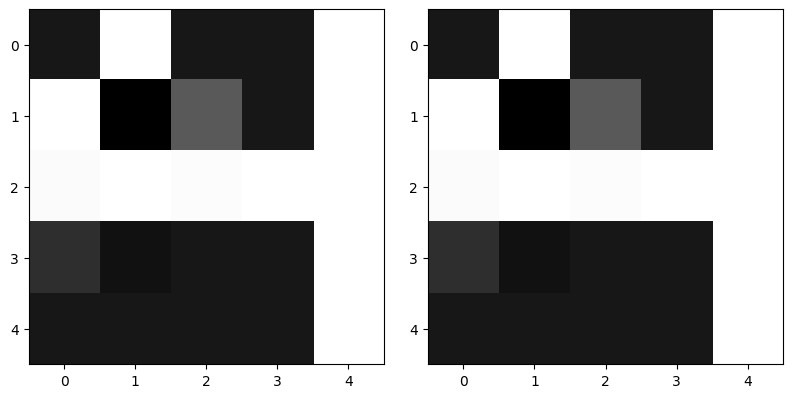

In [42]:
a = np.array([0.00000000e+00,  2.78729541e-01,  0.0,  0, 2.78729541e-01, 
 2.78729541e-01, -2.84542484e-02,  8.03826593e-02,  0, 2.78729541e-01,
  2.73853746e-01,  2.78729541e-01,  2.74293607e-01,  2.78729541e-01, 2.78729541e-01,
  2.77562977e-02, -7.06315478e-03,  2.34715414e-04,  0, 2.78729541e-01,
  0,0,0,0, 2.78729541e-01
])

fig, axes = plt.subplots(1,2, figsize=(8,8))
fig.tight_layout(pad=0.1)
for i,ax in enumerate(axes.flat):
    
    # Display the image
    ax.imshow(a.reshape(5,5),cmap='gray')


Here we represent transpose of data input bcoz our dataset have different transpose form.

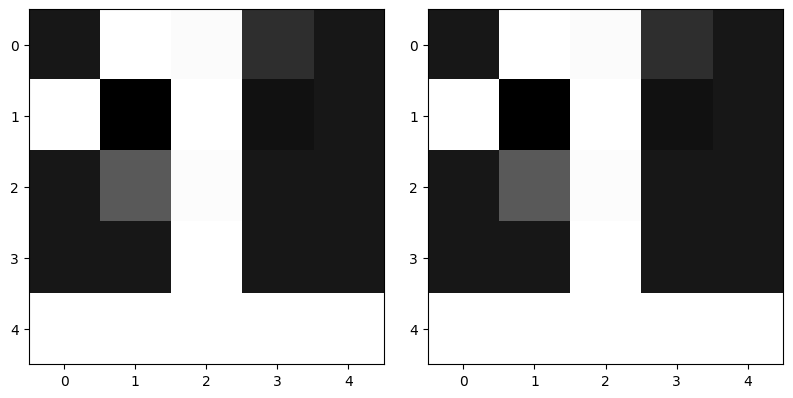

In [43]:

fig, axes = plt.subplots(1,2, figsize=(8,8))
fig.tight_layout(pad=0.1)
for i,ax in enumerate(axes.flat):
    
    # Display the image
    ax.imshow(a.reshape(5,5).T,cmap='gray')

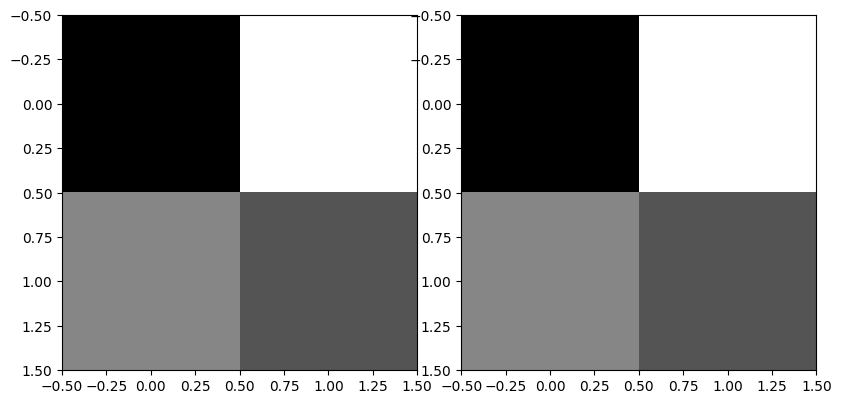

In [44]:
a = np.array([0,190,100,63])

fig, axes = plt.subplots(1,2, figsize=(8,8))
fig.tight_layout(pad=0.1)
for i,ax in enumerate(axes.flat):
    
    # Display the image
    ax.imshow(a.reshape(2,2),cmap='gray')


# Now starting nn implementation

<a name="2.3"></a>
### 2.3 Model representation

The neural network you will use in this assignment is shown in the figure below. 
- This has three dense layers with sigmoid activations.
    - Recall that our inputs are pixel values of digit images.
    - Since the images are of size $20\times20$, this gives us $400$ inputs  
    
<img src="images/C2_W1_Assign1.PNG" width="500" height="400">

- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2 and $1$ output unit in layer 3. 

    - Recall that the dimensions of these parameters are determined as follows:
        - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then 
            - $W$ will be of dimension $s_{in} \times s_{out}$.
            - $b$ will a vector with $s_{out}$ elements
  
    - Therefore, the shapes of `W`, and `b`,  are 
        - layer1: The shape of `W1` is (400, 25) and the shape of `b1` is (25,)
        - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
        - layer3: The shape of `W3` is (15, 1) and the shape of `b3` is: (1,)
>**Note:** The bias vector `b` could be represented as a 1-D (n,) or 2-D (1,n) array. Tensorflow utilizes a 1-D representation and this lab will maintain that convention. 
               

- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2 and $1$ output unit in layer 3. 

    - Recall that the dimensions of these parameters are determined as follows:
        - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then 
            - $W$ will be of dimension $s_{in} \times s_{out}$.
            - $b$ will a vector with $s_{out}$ elements
  
    - Therefore, the shapes of `W`, and `b`,  are 
        - layer1: The shape of `W1` is (400, 25) and the shape of `b1` is (25,)
        - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
        - layer3: The shape of `W3` is (15, 1) and the shape of `b3` is: (1,)
>**Note:** The bias vector `b` could be represented as a 1-D (n,) or 2-D (1,n) array. Tensorflow utilizes a 1-D representation and this lab will maintain that convention. 
               


Below, using Keras [Sequential model](https://keras.io/guides/sequential_model/) and [Dense Layer](https://keras.io/api/layers/core_layers/dense/) with a sigmoid activation to construct the network described above.

In [45]:
model = Sequential(
    [
        #specify input size 
        tf.keras.Input(shape=(400,)),

        tf.keras.layers.Dense(25, activation='sigmoid'),
        tf.keras.layers.Dense(15, activation='sigmoid'),
        tf.keras.layers.Dense(1, activation='sigmoid')

        #Last layer is single neuron means for binary classification whether image is 0 or 1.
    ], name = 'my_model'

)

In [46]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                10025     
                                                                 
 dense_4 (Dense)             (None, 15)                390       
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


Let's further examine the weights to verify that tensorflow produced the same dimensions as we calculated above.

In [47]:
[layer1, layer2, layer3] = model.layers

W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


The parameter counts shown in the summary correspond to the number of elements in the weight and bias arrays as shown below.

In [48]:
L1_num_params = 400 * 25 + 25  # W1 parameters  + b1 parameters
L2_num_params = 25 * 15 + 15   # W2 parameters  + b2 parameters
L3_num_params = 15 * 1 + 1     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

L1 params =  10025 , L2 params =  390 ,  L3 params =  16


`xx.get_weights` returns a NumPy array. One can also access the weights directly in their tensor form. Note the shape of the tensors in the final layer.

In [49]:
print(model.layers[2].weights)

[<tf.Variable 'dense_5/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[ 0.20183045],
       [ 0.16397196],
       [-0.57817143],
       [-0.59480315],
       [ 0.4813071 ],
       [ 0.18895197],
       [-0.2947389 ],
       [-0.33831534],
       [ 0.50464517],
       [ 0.33723682],
       [ 0.3666286 ],
       [-0.095581  ],
       [-0.21631885],
       [-0.24849424],
       [ 0.50407785]], dtype=float32)>, <tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


The following code will define a loss function and run gradient descent to fit the weights of the model to the training data. This will be explained in more detail in the following week.

In [50]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 [==============================] - 2s 6ms/step - loss: 0.6130
Epoch 2/20
32/32 [==============================] - 0s 4ms/step - loss: 0.4373
Epoch 3/20
32/32 [==============================] - 0s 4ms/step - loss: 0.2818
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 0.1852
Epoch 5/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1318
Epoch 6/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1003
Epoch 7/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0799
Epoch 8/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0657
Epoch 9/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0555
Epoch 10/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0477
Epoch 11/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0417
Epoch 12/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0370
Epoch 13/20
32/32 [==============================

To run the model on an example to make a prediction, use [Keras `predict`](https://www.tensorflow.org/api_docs/python/tf/keras/Model). The input to `predict` is an array so the single example is reshaped to be two dimensional.
Since our matrix X which is has 1000 number of training sample and each sample has 400 features so X is of size (1000,400) and single example is of form (1,400)

In [51]:
prediction = model.predict(X[0].reshape(1,400))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400))  # a one
print(f" predicting a one:  {prediction}")

1/1 [==============================] - 0s 187ms/step
 predicting a zero: [[0.01529673]]
1/1 [==============================] - 0s 63ms/step
 predicting a one:  [[0.9880922]]


The output of the model is interpreted as a probability. In the first example above, the input is a zero. The model predicts the probability that the input is a one is nearly zero. 
In the second example, the input is a one. The model predicts the probability that the input is a one is nearly one.
As in the case of logistic regression, the probability is compared to a threshold to make a final prediction.

In [52]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


Let's compare the predictions vs the labels for a random sample of 64 digits.

1/1 [==============================] - 0s 50ms/step


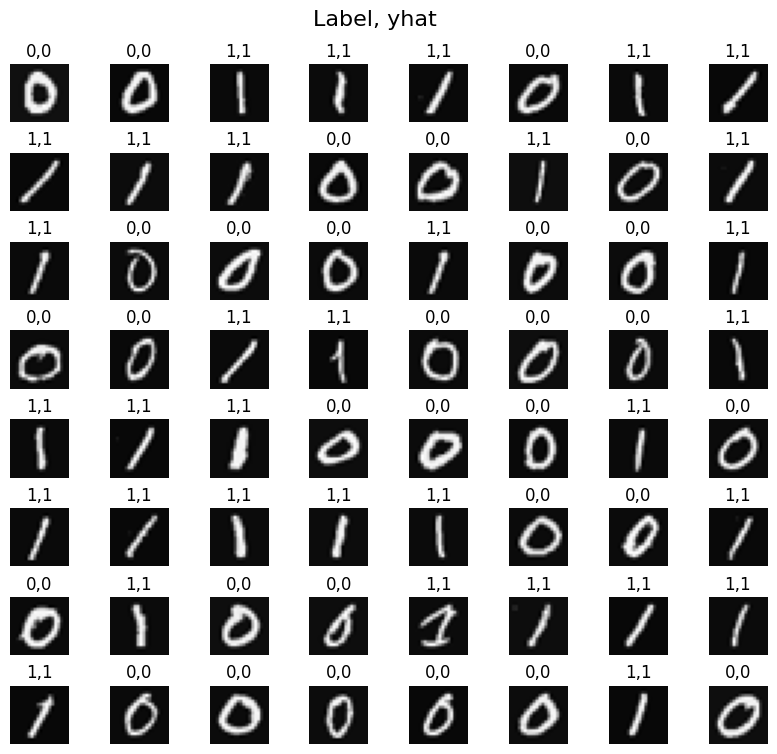

In [53]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400)) #See in keras predict above! Why predict have this reshape
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

Till this is 1st blog of NN handwriten below are upcoming blogs.

# This is second part of blog

<a name="2.5"></a>
### 2.5 NumPy Model Implementation (Forward Prop in NumPy)
As described in lecture, it is possible to build your own dense layer using NumPy. This can then be utilized to build a multi-layer neural network. 

<img src="images/C2_W1_dense2.PNG" width="600" height="450">



Below, build a dense layer subroutine. The example in lecture utilized a for loop to visit each unit (`j`) in the layer and perform the dot product of the weights for that unit (`W[:,j]`) and sum the bias for the unit (`b[j]`) to form `z`. An activation function `g(z)` is then applied to that result. This section will not utilize some of the matrix operations described in the optional lectures. These will be explored in a later section.

#### We are implementing neuron from scratch. At beginning create NN for 1 input which is x[0] who have 400 features means we have 400 weights for 1 neuron and 1 bias. Total in 1st layer we have 25 neurons so (400,) is input (400,25) is weights shape.
# f = w.x +b <br>
**where w = W[:,1]** [:,1] take all elements across row i.e 0:400 of 1st column
`Consider all 400 weights of 1st column thus we have 400 feautres and 400 weights w, 1 bias b for 1 neuron we have such 25 so repeat this 25 times`



In [54]:
# UNQ_C2
# GRADED FUNCTION: my_dense

def my_dense(a_in, W, b, g):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example 
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      a_out (ndarray (j,))  : j units
    """
    units = W.shape[1]
    a_out = np.zeros(units)
    for i in range(units):
        w = W[:,i]   #same as w = W[0:399,i] all 400 weights along ith column
        z = np.dot(a_in,w) + b[i]
        a_out[i] = sigmoid(z) 
    return(a_out)


In [55]:
# Quick Check
x_tst = 0.1*np.arange(1,3,1).reshape(2,)  # (1 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(3,)  # (3 features)
A_tst = my_dense(x_tst, W_tst, b_tst, sigmoid)
print(x_tst)
print(W_tst)
print(A_tst)

[0.1 0.2]
[[0.1 0.2 0.3]
 [0.4 0.5 0.6]]
[0.54735762 0.57932425 0.61063923]


The following cell builds a three-layer neural network utilizing the `my_dense` subroutine above.

In [56]:
def my_sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = my_dense(x,W1,b1,sigmoid)
    a2 = my_dense(a1,W2,b2,sigmoid)
    a3 = my_dense(a2,W3,b3,sigmoid)
    return a3

We will use same trained weights and biases from Tensorflow.

In [57]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()
#We have 1000 such example which we can change by giving number
print(X[0].shape,W1_tmp.shape[0])  #This should same since every features should have corresponding weights
print("This is single input with 400 feautres",X[0])
print("This is w1 which has 400 weights along 1st column ",W1_tmp[:,1])



(400,) 400
This is single input with 400 feautres [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.0000

In [64]:
# make predictions

prediction = my_sequential(X[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[0,0])
prediction = my_sequential(X[500], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[500,0])

[0.01529674]
yhat =  0  label=  0
yhat =  1  label=  1


Run the following cell to see predictions from both the Numpy model and the Tensorflow model. This takes a moment to run.

1/1 [==============================] - 0s 310ms/step


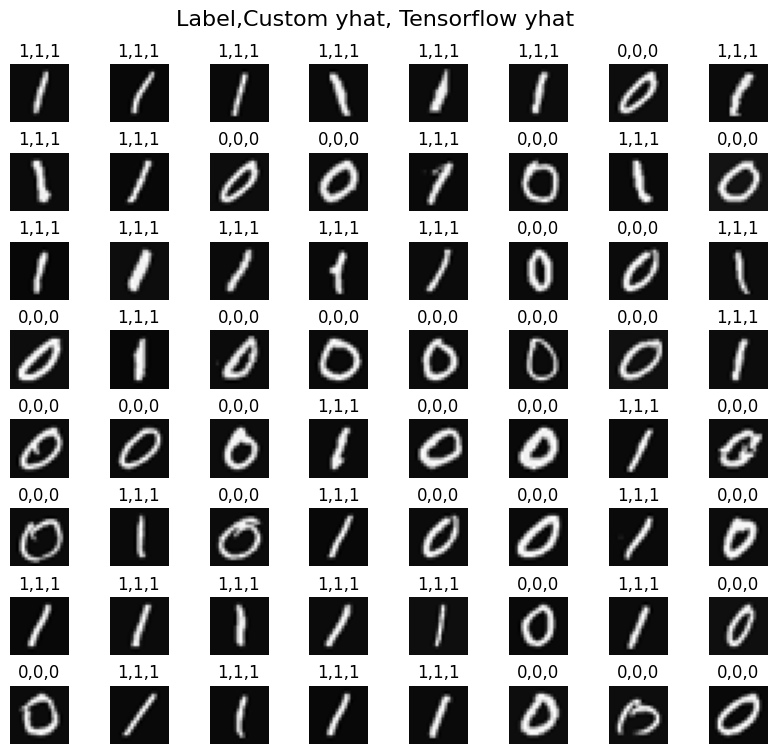

In [68]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the custom function
    prediction = my_sequential(X[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp ) 
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Prediction using tensorflow
    prediction = model.predict(X[random_index].reshape(1,400)) 
    if prediction >= 0.5:
        tf_yhat = 1
    else:
        tf_yhat = 0
    

    # Display the label above the image
    ax.set_title(f"{y[random_index][0]},{tf_yhat}, {yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat Tensorflow, yhat Numpy", fontsize=16)
plt.show()


0


# Third part vector representation